In [81]:
import numpy as np
import pandas as pd

from scipy import stats

from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('/home/yukos/work/hse/applied_stats/week2/diamond_prices.csv')

In [12]:
df

,price,predicted_price_lm,predicted_price_gbdt
0,564,747.149466,799.049243
1,5914,6644.569397,6635.491541
2,2562,2096.573114,2138.584133
3,537,727.031366,694.107710
4,5964,7180.988674,7425.353560
...,...,...,...
13480,2239,2403.202635,2354.263323
13481,1092,908.723195,896.414922
13482,3285,4534.975464,4638.855560
13483,3734,3465.940124,3381.763771


In [40]:
(sum((df['predicted_price_lm'] - df['price']).abs()) - sum((df['predicted_price_gbdt'] - df['price']).abs()))/df.shape[0]

6.875650288841439

In [27]:
stats.ttest_ind?

Signature:
stats.ttest_ind(
    a,
    b,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versi

In [78]:
stats.ttest_ind((df['predicted_price_lm'] - df['price']).abs().values, (df['predicted_price_gbdt'] - df['price']).abs().values, equal_var=True)

Ttest_indResult(statistic=0.5068941034999136, pvalue=0.612233267646038)

In [80]:
stats.ttest_rel((df['predicted_price_lm'] - df['price']).abs().values, (df['predicted_price_gbdt'] - df['price']).abs().values)

Ttest_relResult(statistic=2.382783477618914, pvalue=0.017196067393118585)

In [82]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW((df['predicted_price_lm'] - df['price']).abs().values- (df['predicted_price_gbdt'] - df['price']).abs().values).tconfint_mean())

95% confidence interval: [1.219561, 12.531740]


<AxesSubplot:xlabel='price', ylabel='predicted_price_gbdt'>

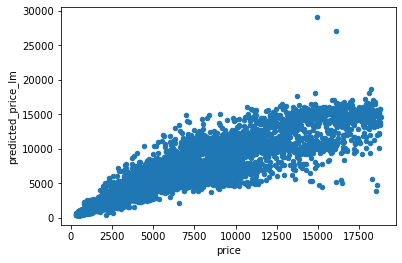

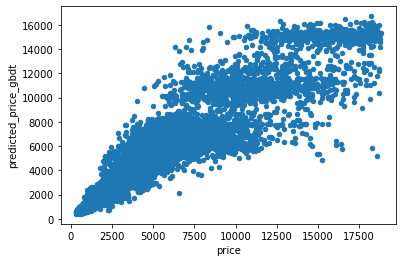

In [23]:
df.plot.scatter('price', 'predicted_price_lm')
df.plot.scatter('price', 'predicted_price_gbdt')